# Read and plot the observations

In [29]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()
include("../scripts/CopepodsNN.jl")
include("../scripts/param.jl")
using CairoMakie
using GeoMakie
using JupyterFormatter
enable_autoformat()

  Activating project at `~/Projects/EMODnet/EMODnet-Biology/EMODnet-Biology-Interpolation-NN-Copepods`


6-element Vector{Function}:
 format_current_cell (generic function with 1 method)
 format_current_cell (generic function with 1 method)
 format_current_cell (generic function with 1 method)
 format_current_cell (generic function with 1 method)
 format_current_cell (generic function with 1 method)
 format_current_cell (generic function with 1 method)

## Set region of interest

In [36]:
regionname = "NortheastAtlantic"  # "NorthAtlantic"
domain = regiondict[regionname];

### Quick map to show domain

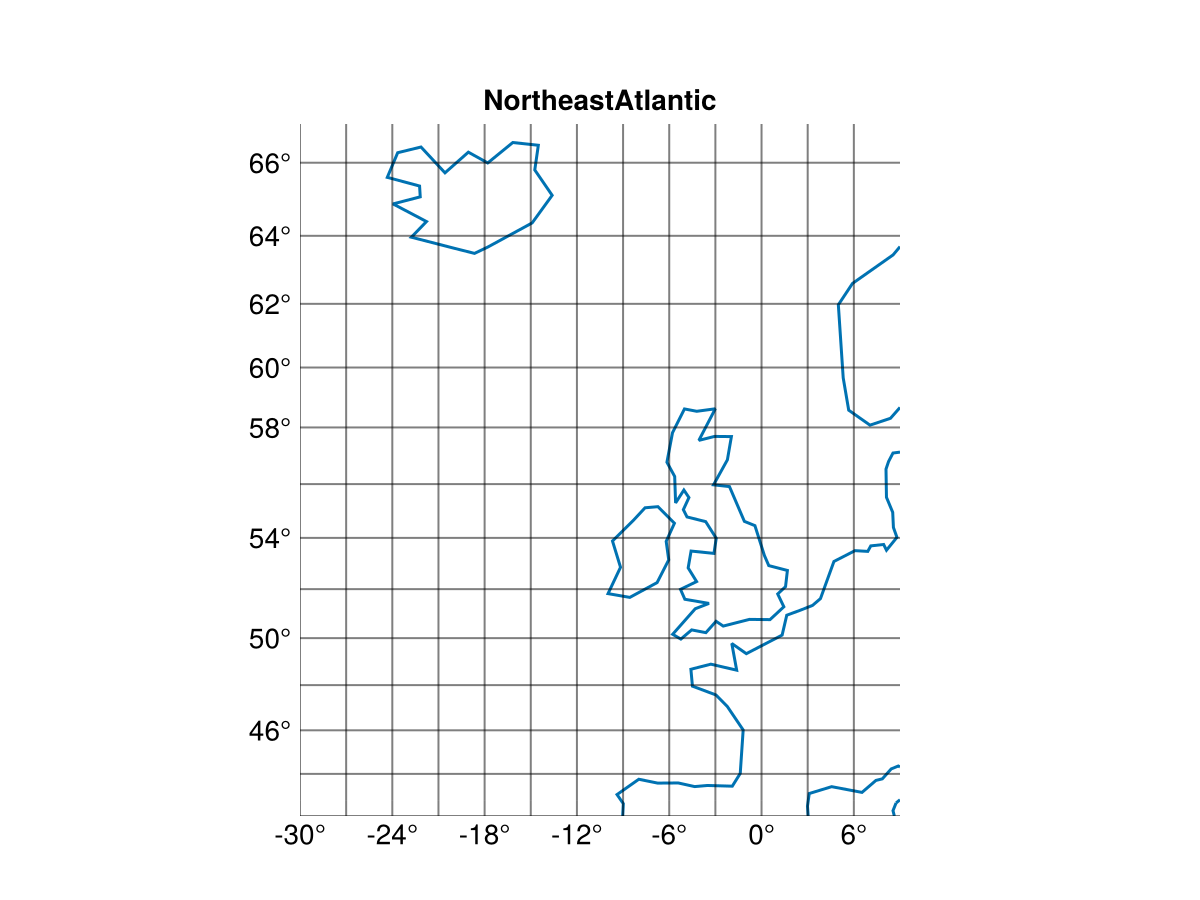

CairoMakie.Screen{IMAGE}


In [41]:
fig = Figure()
ax = GeoAxis(fig[1, 1], dest = "proj=merc", title = regionname)
xlims!(domain[1], domain[2])
ylims!(domain[3], domain[4])
lines!(ax, GeoMakie.coastlines())
display(fig)

## Load raw data file

In [42]:
isfile(rawdatafile) ? @info("Raw data file already downloaded") :
@error("Data file has to be downloaded (DOI: ...")
@time lon, lat, dates, copepods_large, copepods_small, sampleID =
    CopepodsNN.read_copepods_csv(rawdatafile);
@info extrema(dates);

[ Info: Raw data file already downloaded
[ Info: Sorting observations chronologically


  1.943781 seconds (13.33 M allocations: 473.793 MiB, 34.44% gc time, 6.44% compilation time)


[ Info: (Date("1958-01-01"), Date("2022-12-25"))


## Plot the observations

In [43]:
lon_landsea, lat_landsea, landsea = CopepodsNN.get_landsea_mask(domain);

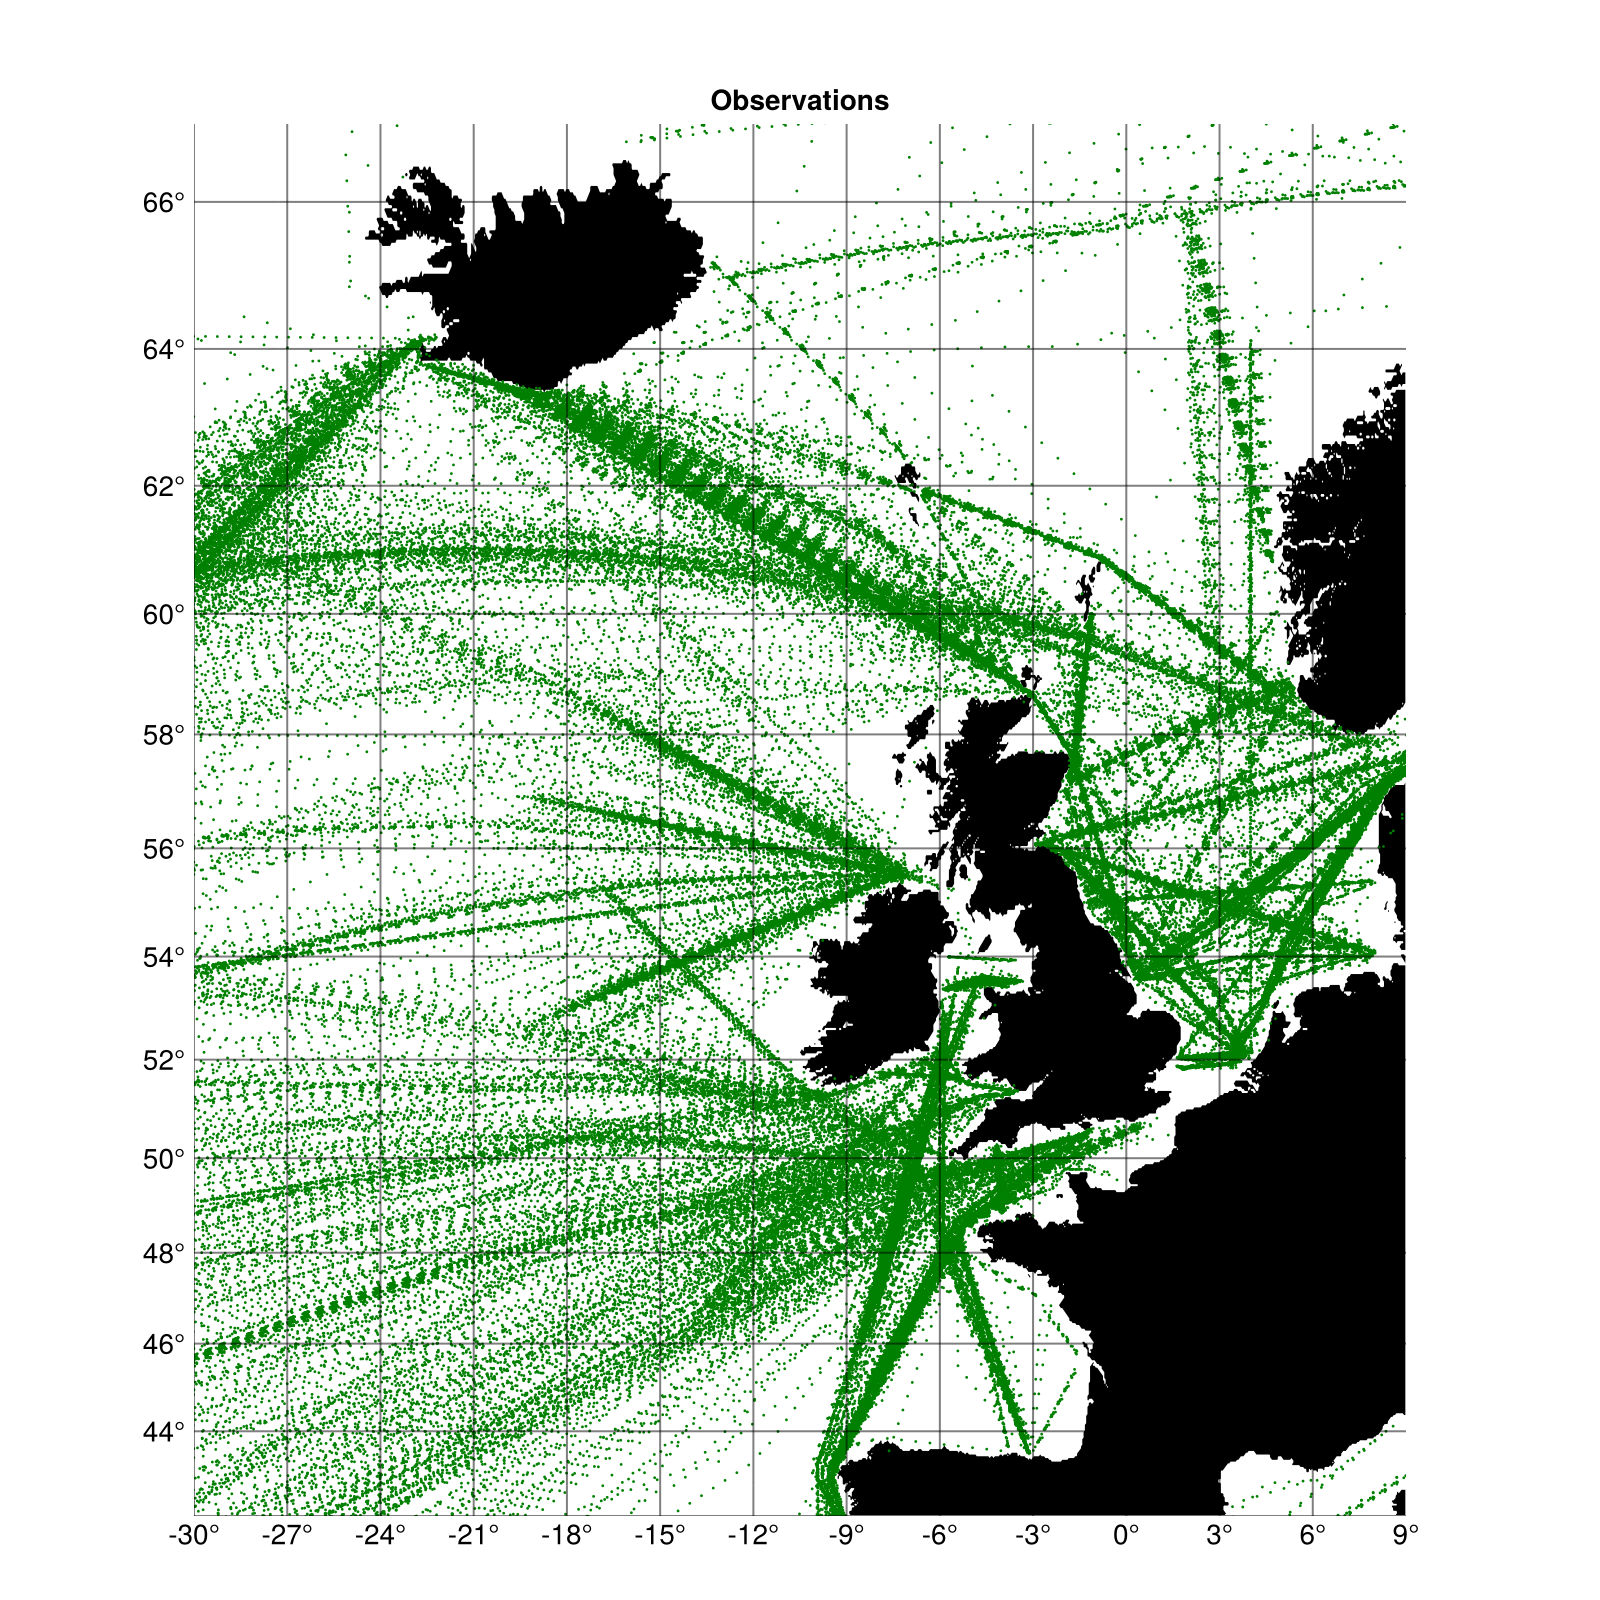

CairoMakie.Screen{IMAGE}


In [44]:
fig = Figure(size = (800, 800))
ax = GeoAxis(fig[1, 1], dest = "proj=merc", title = "Observations")
xlims!(domain[1], domain[2])
ylims!(domain[3], domain[4])
contourf!(ax, lon_landsea, lat_landsea, landsea, colormap = :binary, levels = 2)
scatter!(ax, lon, lat, color = :green, markersize = 2)
save(joinpath(figdir, "data_location_$(regionname).png"), fig)
display(fig)

### Value histograms

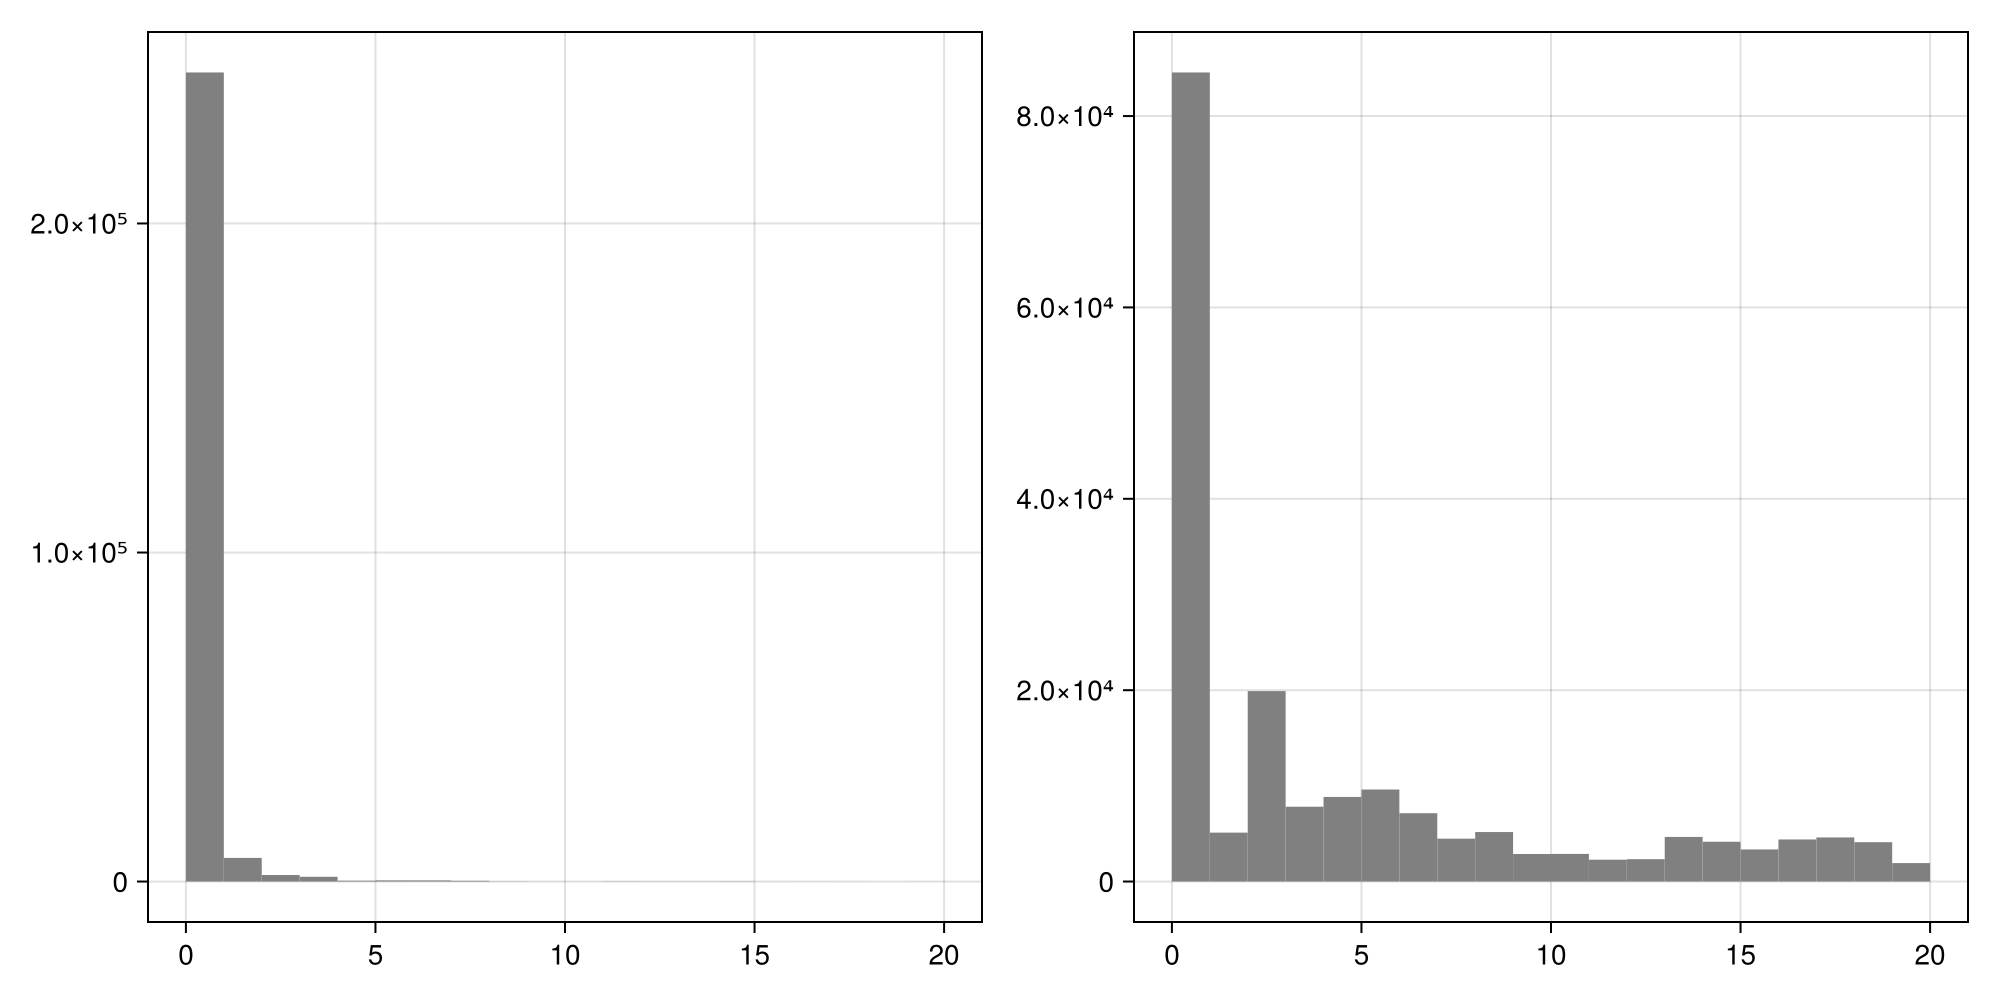

CairoMakie.Screen{IMAGE}


In [45]:
fig = Figure(size = (1000, 500))
ax1 = Axis(fig[1, 1])
hist!(ax1, copepods_small, bins = collect(0:1:20.0), color = :grey)
ax2 = Axis(fig[1, 2])
hist!(ax2, copepods_large, bins = collect(0:1:20.0), color = :grey)
display(fig)

## Write the data in netCDF

In [46]:
@time obsid, tracknum = CopepodsNN.get_obsid(sampleID);
CopepodsNN.write_netcdf_CPR(
    joinpath(dataprocdir, "Small_copepods_DINCAE_$(regionname).nc"),
    lon,
    lat,
    dates,
    copepods_small,
    "Small_copepods",
    obsid,
    fielddates_monthly,
);

@time obsid, tracknum = CopepodsNN.get_obsid(sampleID);
CopepodsNN.write_netcdf_CPR(
    joinpath(dataprocdir, "Large_copepods_DINCAE_$(regionname).nc"),
    lon,
    lat,
    dates,
    copepods_large,
    "Large_copepods",
    obsid,
    fielddates_monthly,
);

 14.819621 seconds (1.11 M allocations: 531.522 MiB, 4.62% gc time, 1.01% compilation time)
 12.419929 seconds (679.66 k allocations: 510.572 MiB, 0.80% gc time, 0.03% compilation time)
